<a href="https://colab.research.google.com/github/ssooni/data_mining_practice/blob/master/dust_weather/dust_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏ 
Ï†ú Í∞úÏù∏ ÎìúÎùºÏù¥Î∏åÏóê ÏûàÎäî Î∂ÄÎ∂ÑÏù¥Îùº ÏïÑÎûò Î∂ÄÎ∂ÑÏùÄ Ïã§ÌñâÌï¥ÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÄ ÏóÜÏäµÎãàÎã§.

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/dataset', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /dataset


In [ ]:
!ls -la /dataset/MyDrive/dust/
!pip install --upgrade tables

total 1622893
-rw------- 1 root root    2439292 Jan  5 22:44 'best_model (1).pt'
-rw------- 1 root root    2439291 Jan  5 03:42  best_model.pt
-rw------- 1 root root 1655826560 Jul  8  2019  data.hdf
-rw------- 1 root root      20499 Mar  3 16:00  LARD_ADM_SECT_SGG_11.dbf
-rw------- 1 root root        761 Mar  3 16:00  LARD_ADM_SECT_SGG_11.prj
-rw------- 1 root root     494976 Mar  3 16:00  LARD_ADM_SECT_SGG_11.shp
-rw------- 1 root root        308 Mar  3 16:00  LARD_ADM_SECT_SGG_11.shx
-rw------- 1 root root     618368 Mar  4 10:43  seoul_municipalities.shp
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.3MB 17.7MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import random
import os

from sklearn.preprocessing import MinMaxScaler

BATCH_SIZE = 64
lr = 0.001
EPOCHS = 10
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

SEED = 5
random.seed(SEED)
torch.manual_seed(SEED)

print("cpuÏôÄ cuda Ï§ë Îã§Ïùå Í∏∞Í∏∞Î°ú ÌïôÏäµÌï®:", DEVICE)

cpuÏôÄ cuda Ï§ë Îã§Ïùå Í∏∞Í∏∞Î°ú ÌïôÏäµÌï®: cuda


## Îç∞Ïù¥ÌÑ∞
Îç∞Ïù¥ÌÑ∞Îäî 2009.01.01 ~ 2019.01.01 ÏÇ¨Ïù¥Ïùò ÏÑúÏö∏ ÎÇ†Ïî®ÏôÄ ÏÑúÏö∏ÏãúÎÇ¥ Íµ¨ Î≥ÑÎ°ú ÏÑ§ÏπòÎêú ÎØ∏ÏÑ∏Î®ºÏßÄ Ï∏°Ï†ï Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.  
ÎØ∏ÏÑ∏Î®ºÏßÄ Ï∏°Ï†ï Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÅÍ∞Å apiÎ•º ÌÜµÌï¥ÏÑú 10ÎÖÑÏπòÎ•º ÏàòÏßë ÌõÑ hdf ÌååÏùºÎ°ú Ï†ÄÏû•ÌïòÏòÄÏúºÎ©∞, Í∑∏ Í≥ºÏ†ïÏùÄ Ïù¥Î≤à ÏÜåÏä§ ÏΩîÎìúÏóêÏÑú Ï†úÏô∏ÌïòÏòÄÎã§.  
Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Ìï≠Î™© Ï§ëÏóêÎäî ÏäµÎèÑ, Ïò®ÎèÑ, ÌíçÏÜç, ÌêÅÌñ•, Í∏∞ÏïïÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏúºÎ©∞, ÎØ∏ÏÑ∏Î®ºÏßÄÎÜçÎèÑÎäî PM2.5 ÏàòÏπòÎ•º ÏÇ¨Ïö©ÌïòÏòÄÎã§.


*Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞Ìè¨ÌÑ∏*


In [ ]:
import pandas as pd
import numpy as np

master = pd.read_hdf("/dataset/MyDrive/dust/data.hdf", "master", mode='r')

master = master.sort_index()

X_label = ['HM', 'PA', 'PS', 'PV','TA', 'TD', 'TS', 'WD', 'WS'] # ÏäµÎèÑ, ÎåÄÍ∏∞Ïïï, 
y_label = ['PM25']

master[X_label + y_label].head()

HM      PA      PS   PV   TA    TD    TS     WD   WS  PM25
2009-01-01  55.0  1013.7  1024.9  1.9 -7.6 -15.0 -10.1  290.0  2.1  14.0
2009-01-01  55.0  1013.7  1024.9  1.9 -7.6 -15.0 -10.1  290.0  2.1  13.0
2009-01-01  55.0  1013.7  1024.9  1.9 -7.6 -15.0 -10.1  290.0  2.1  12.0
2009-01-01  55.0  1013.7  1024.9  1.9 -7.6 -15.0 -10.1  290.0  2.1  18.0
2009-01-01  55.0  1013.7  1024.9  1.9 -7.6 -15.0 -10.1  290.0  2.1  19.0

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style('whitegrid')

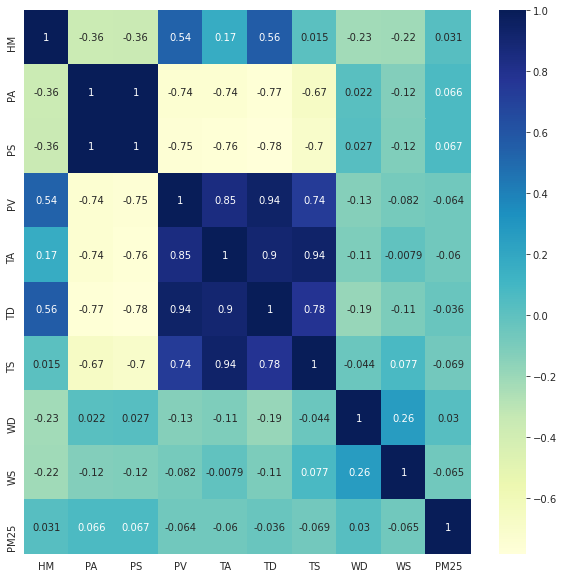

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(master[X_label + y_label].corr(), annot=True, cmap='YlGnBu')

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
1. ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞   
ÎØ∏ÏÑ∏Î®ºÏßÄ Îç∞Ïù¥ÌÑ∞Ïùò ÎàÑÎùΩÏù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§. NanÏúºÎ°ú ÎêòÏñ¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îäî ÌïôÏäµ Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÍ∏∞ ÎñÑÎ¨∏Ïóê Î∞òÎìúÏãú Ï≤òÎ¶¨Ìï¥Ïïº ÌïòÎ©∞,  
Ïù¥Ï†Ñ ÏãúÍ∞ÑÏóê Ï∏°Ï†ïÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï±ÑÏö∞Îäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌñàÎã§.

2. Normalization  
Í∏∞Ïïï, ÏäµÎèÑ, Ïò®ÎèÑ Îì±ÏùÄ Í∞ÅÍ∞Å Ï∏°Ï†ïÌïòÎäî Îã®ÏúÑÍ∞Ä Îã§Î•¥Í≥† Îß§ ÏãúÍ∞Ñ Î≥ÄÌôîÌïòÎäî ÌÅ¨Í∏∞ÎèÑ Îã§Î•¥Îã§.  
Ïù¥Îü¨Ìïú Ï∞®Ïù¥ Ïó≠Ïãú ÌïôÏäµÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÎäî Î∂ÄÎ∂ÑÏù¥ÎØÄÎ°ú Min-Max SacaleÏùÑ Ìï¥ÏÑú 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Î≥ÄÍ≤ΩÌïúÎã§. 

3. Í∑∏ Ïô∏  
ÏÑúÏö∏Ïãú Í∞ïÎÇ®Ïùò Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©ÌïòÏòÄÎã§.  
ColabÏùò ÏÇ¨Ïö© Í∞ÄÎä•Ìïú RAM Ï†úÌïúÏùÑ ÎÑòÏñ¥Î≤ÑÎ¶¨Îäî Î∞îÎûåÏóê 30000Í±¥ Ï†ïÎèÑÎßå Î™®Îç∏ÎßÅ ÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêòÏóàÎã§.  
Î∞∞Ïπò Î∞©ÏãùÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÎ©¥ Îû®ÏùÑ Ï°∞Í∏à Îçú Ïì∏ Ïàò ÏûàÎã§.   
ÌïôÏäµ : ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏú®ÏùÄ 9:1Î°ú ÌïòÏòÄÎã§.  
Slide Window = 20 ÏúºÎ°ú ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î•º Ïû¨Íµ¨ÏÑ±ÌïòÏòÄÎã§.

In [ ]:
sample = master[master["MSRSTE_NM"]== "Í∞ïÎÇ®Íµ¨"][X_label + y_label] # ÏÑúÏö∏Ïãú Í∞ïÎÇ®Íµ¨Ïùò Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©
sample = sample.fillna(method='ffill')
scaler = MinMaxScaler(feature_range=(-1, 1))
for l in X_label:
   sample[l] = scaler.fit_transform(sample[l].values.reshape(-1,1))

### Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
PM2.5 ÎØ∏ÏÑ∏Î®ºÏßÄ ÎÜçÎèÑÏùò Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º ÌôïÏù∏ ÌïòÍ∏∞ ÏúÑÌï¥ Î∞ÄÎèÑ Ìï®ÏàòÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º ÌôïÏù∏ Ìï¥Î≥¥ÏïòÎã§.  
200Ïù¥ ÎÑòÎäî Ï†ÅÏùÄ ÏàòÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäîÎç∞, ÏÉÅÏúÑ 0.5ÌîÑÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º Ïù¥ÏÉÅÏπòÎ°ú ÌïòÍ≥† Ï†úÍ±∞ÌïòÎäî ÏûëÏóÖÏùÑ ÌïòÏòÄÎã§. 

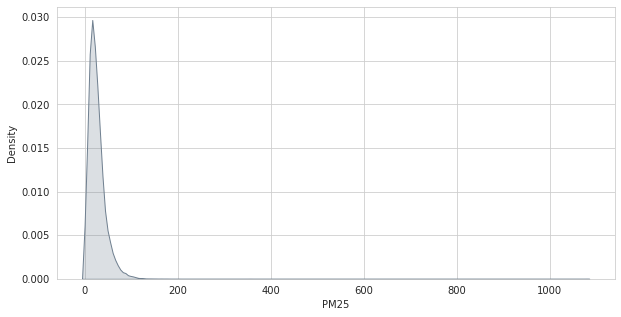

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='PM25', data=sample[['PM25']], fill=True, color='slategray');

In [ ]:
outliner = sample['PM25'].quantile(0.995)
print("outliner : ",  outliner)
print(sample[sample['PM25'] > outliner].shape[0], "/", sample.shape[0])
plt.figure(figsize=(10,5))
sns.kdeplot(x='PM25', data=sample[sample['PM25'] < outliner][['PM25']], fill=True, color='slategray');

outliner :  99.0
339 / 69280


In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def split_data(raw_data, lookback,batch_size=2, outliner=None, target="PM25"):
  data = []

  if outliner is not None:
    # Ïù¥ÏÉÅÏπò ÎØ∏Îßå Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©
    raw_data2 = raw_data[raw_data[target] < outliner]
    data_raw = raw_data2.to_numpy() 
  else:
    data_raw = raw_data.to_numpy()

  y = np.reshape(data_raw[:, -1], (-1, 1))

  # create all possible sequences of length seq_len
  for index in range(len(data_raw) - lookback): 
      data.append(data_raw[index: index + lookback])
  
  data = np.array(data);
  test_set_size = int(np.round(0.1 * data.shape[0]));
  train_set_size = data.shape[0] - (test_set_size);
  
  x_train = torch.from_numpy(data[:train_set_size, :, :-1]).type(torch.Tensor)
  y_train = torch.from_numpy(y[lookback:train_set_size+lookback, :]).type(torch.Tensor)
  
  x_test = torch.from_numpy(data[train_set_size: , :, :-1]).type(torch.Tensor)
  y_test = torch.from_numpy(y[train_set_size+lookback:, :]).type(torch.Tensor)
  
  train_set = TensorDataset(x_train, y_train)
  test_set = TensorDataset(x_train, y_train)

  dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
  dataloader2 = DataLoader(test_set, batch_size=batch_size, shuffle=True)

  return x_train, y_train, x_test, y_test, dataloader, dataloader2

In [ ]:
x_train, y_train, x_test, y_test, dataloader, dataloader2 = split_data(sample, 20, 32, outliner=outliner)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([62008, 20, 9]) torch.Size([6890, 20, 9])
torch.Size([62008, 1]) torch.Size([6890, 1])


## GRU
Sequance ModelÏùò Ìïú Ï¢ÖÎ•òÎ°ú LSTMÏùò Í∞ÑÏÜåÌôîÎêú Î≤ÑÏ†ÑÏúºÎ°ú ÏïåÎ†§Ï†∏ ÏûàÎã§.  


In [ ]:
class GRU(nn.Module):
  def __init__(self, n_layers, hidden_dim, input_dim, n_classes=1, dropout_p=0.2):
      super(GRU, self).__init__()
      self.n_layers = n_layers
      self.hidden_dim = hidden_dim

      self.dropout = nn.Dropout(dropout_p)
      self.gru = nn.GRU(input_dim, self.hidden_dim, num_layers=self.n_layers, batch_first=True, dropout=dropout_p)
      self.fc = nn.Linear(self.hidden_dim, n_classes)

  def forward(self, x):
      h0 = self._init_state(x.size(0))
      out, (hn) = self.gru(x, (h0.detach()))
      out = self.fc(out[:, -1, :]) 
      return out

  def _init_state(self, batch_size=1):
      weight = next(self.parameters()).data
      return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(DEVICE)

## ÌïôÏäµ / ÌÖåÏä§Ìä∏ Í≤∞Í≥º
- 100Ìöå Î∞òÎ≥µ ÌïôÏäµÌïòÎ©¥ÏÑú LossÏùò Í∞êÏÜåÎ•º ÌôïÏù∏.  
- LossÎäî Mean Square ErrorÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Ï∏°Ï†ï.  
- OptimiserÎäî AdamÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏùå



In [ ]:
def evaluate(model, val_iter):
  model.eval()
  corrects, total_loss = 0, 0
  
  for batch in val_iter:
    x, y = batch
    y_p = model(x.to(DEVICE))
    loss = torch.nn.MSELoss(reduction='mean')(y_p, y.to(DEVICE))
    total_loss += loss.item()

  size = len(val_iter)
  avg_loss = total_loss / size
  return avg_loss

In [ ]:
import time
import numpy

num_epochs = 100
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

model = GRU(input_dim=len(X_label), hidden_dim=32, n_classes=1, n_layers=1).to(DEVICE)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
torch.cuda.empty_cache()
best_val_loss = None
for t in range(num_epochs):
  model.train()
  for batch_idx, samples in enumerate(dataloader):
    x, y = samples

    y_train_pred = model(x.to(DEVICE))
    # print("pridiction: ", y_train_pred[:10, :], "\n Real: ", y_train[:10])
    optimizer.zero_grad()
    loss = criterion(y_train_pred, y.to(DEVICE))
    
    loss.backward()
    optimizer.step()

  avg_loss = evaluate(model, dataloader2)

  if not best_val_loss or avg_loss < best_val_loss:
      if not os.path.isdir("snapshot"):
          os.makedirs("snapshot")
      torch.save(model.state_dict(), './snapshot/best_model.pt')
 
  if t % 20 == 0:
    print("Epoch ", t, "MSE: ", avg_loss)
  hist[t] = avg_loss

training_time = time.time() - start_time
print("Training time: {}".format(training_time))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch  0 MSE:  249.5931316352112
Epoch  20 MSE:  159.0114177353488
Epoch  40 MSE:  135.6651948174948
Epoch  60 MSE:  125.10893079641556
Epoch  80 MSE:  119.70260373677509
Training time: 761.7089848518372


### Learning rate check / ÌïôÏäµ Í≤∞Í≥º ÌôïÏù∏
LossÍ∞Ä Í∞êÏÜåÌïòÎäî ÏñëÏÉÅÏùÑ ÌôïÏù∏ ÌïòÏòÄÎã§. ÍµêÍ≥ºÏÑúÏóê ÎÇòÏò§Îäî Ï†ïÏÑùÏ†ÅÏù∏ Î™®ÏñëÏù¥Îùº ÎßåÏ°±!! üòä  
ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùÑ ÎπÑÍµêÎèÑ Ìï¥Î≥¥ÏïòÎã§. 

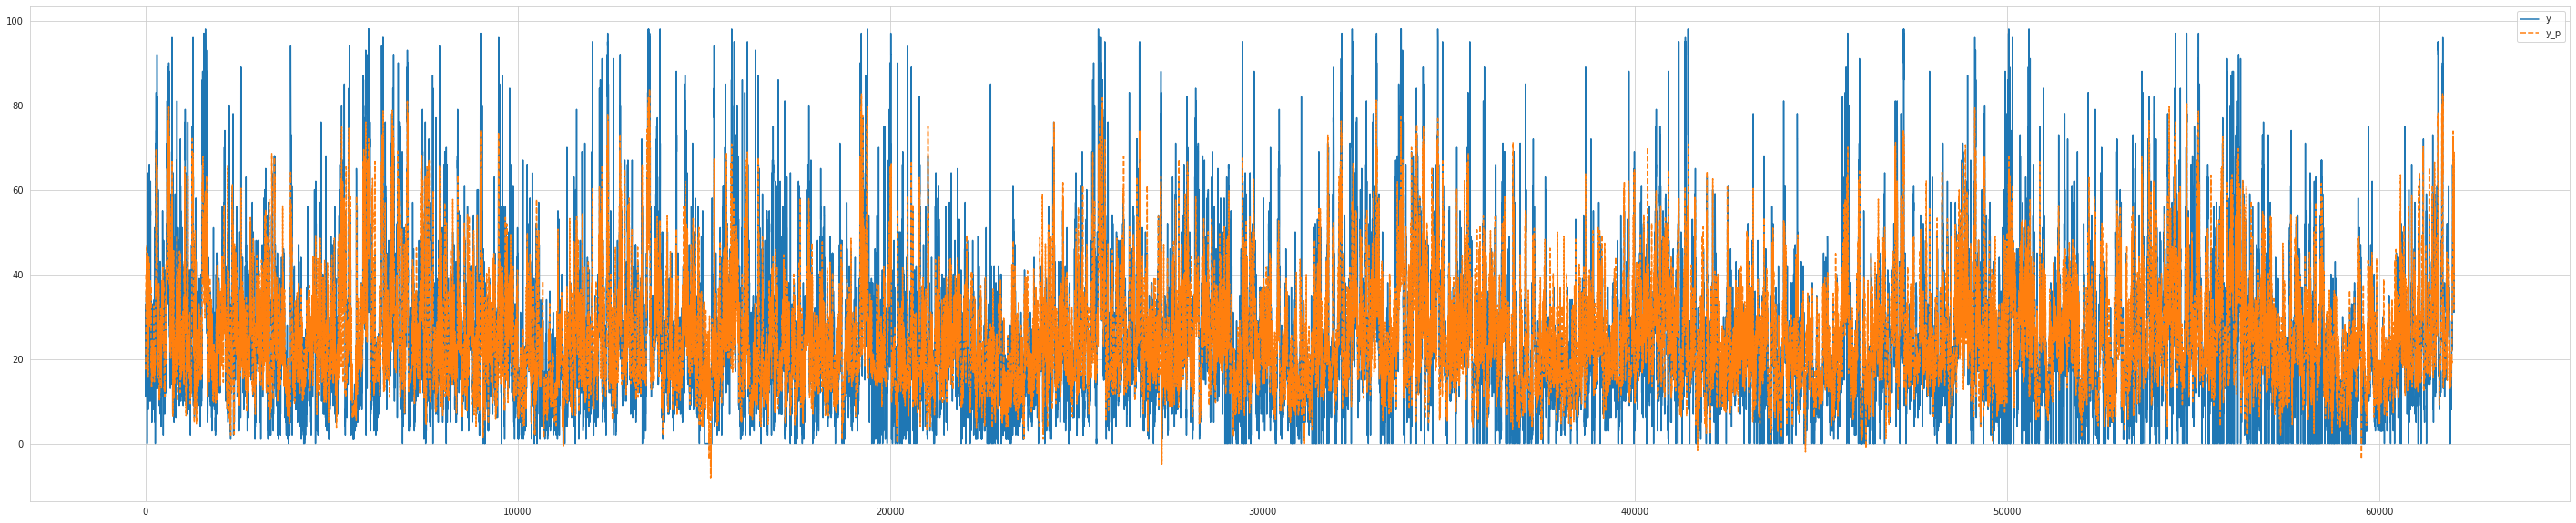

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=pd.DataFrame(hist, columns=["loss"]))

model.eval()
prediction = model(x_train.to(DEVICE)) 
a = pd.DataFrame(y_train.view(-1), columns=["y"])
a["y_p"] = pd.Series(prediction.view(-1).cpu().detach().numpy())
plt.figure(figsize=(50,10))
sns.lineplot(data=a)

### ÌïôÏäµÍ≤∞Í≥º 
Ïñ¥Îäê Ï†ïÎèÑ Ï∂îÏÑ∏Îäî ÎßûÏ∂îÎäî ÎìØ ÌïòÎäîÎç∞, Ïã§Ï†úÏôÄ Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÎäî Íµ¨Í∞ÑÏù¥ ÏûàÎã§.  
MSELossÎèÑ ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïóê ÎπÑÌïòÎ©¥ ÎÑàÎ¨¥ ÌÅ∞ Ìé∏Ïù∏Îç∞, ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï©Ïù¥ ÏùòÏã¨Ïä§ÎüΩÎã§.  



Í≥ºÏ†ÅÌï© ÌöåÌîº  
1. hidden layer Ï°∞Ï†ï : 256 -> 128 Î°ú Ï°∞Ï†ï (Î™®Îç∏ Î≥µÏû°ÎèÑÎ•º ÎÇÆÏ∂îÏñ¥ Î≥¥ÏïòÎã§.)  
256 : 365.24937  
128 : 307.15707  
64 : 305.79993  
32 : 275.61227


Í∑∏ Ïô∏
1. ÎØ∏ÏÑ∏Î®ºÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Î¥§ÏùÑ Îïå Ìïú Î≤àÏî© Ï£ºÎ≥Ä ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞Ïóê ÎπÑÌï¥ Í∞íÏù¥ ÌÅ¨Í≤å Î≥ÄÌôîÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÎäîÎç∞,  
Ìï¥Îãπ ÎèÑÎ©îÏù∏Ïùò ÏßÄÏãùÏù¥ ÏóÜÏñ¥ÏÑú Ìï¥Îãπ Î∂ÄÎ∂ÑÏóê ÎåÄÌïú Ï†ÑÏ≤òÎ¶¨Í∞Ä ÎêòÏßÄ ÏïäÏùÄ Í≤ÉÏù¥ ÏòÅÌñ•ÏùÑ Ï§Ä Í±∞ Í∞ôÎã§.
2. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≤å ÏµúÏ†ÅÌôîÎ•º ÏãúÎèÑÌï¥ÏÑú ÌïôÏäµÏùÑ ÌïúÎã§.   
3. ÏÉàÎ°úÏö¥ FeatureÎ•º Ï∂îÍ∞ÄÌï¥ Î≥¥Îäî Í≤ÉÎèÑ Í≥†ÎØºÌï¥Î≥¥Ïûê.  
Ïòà) Í∞ïÎÇ®Íµ¨ Ï£ºÎ≥ÄÏùò ÎØ∏ÏÑ∏Î®ºÏßÄ Îç∞Ïù¥ÌÑ∞Î•º FeatureÎ°ú ÏÇ¨Ïö©. 

(6890,)
[275.61227]


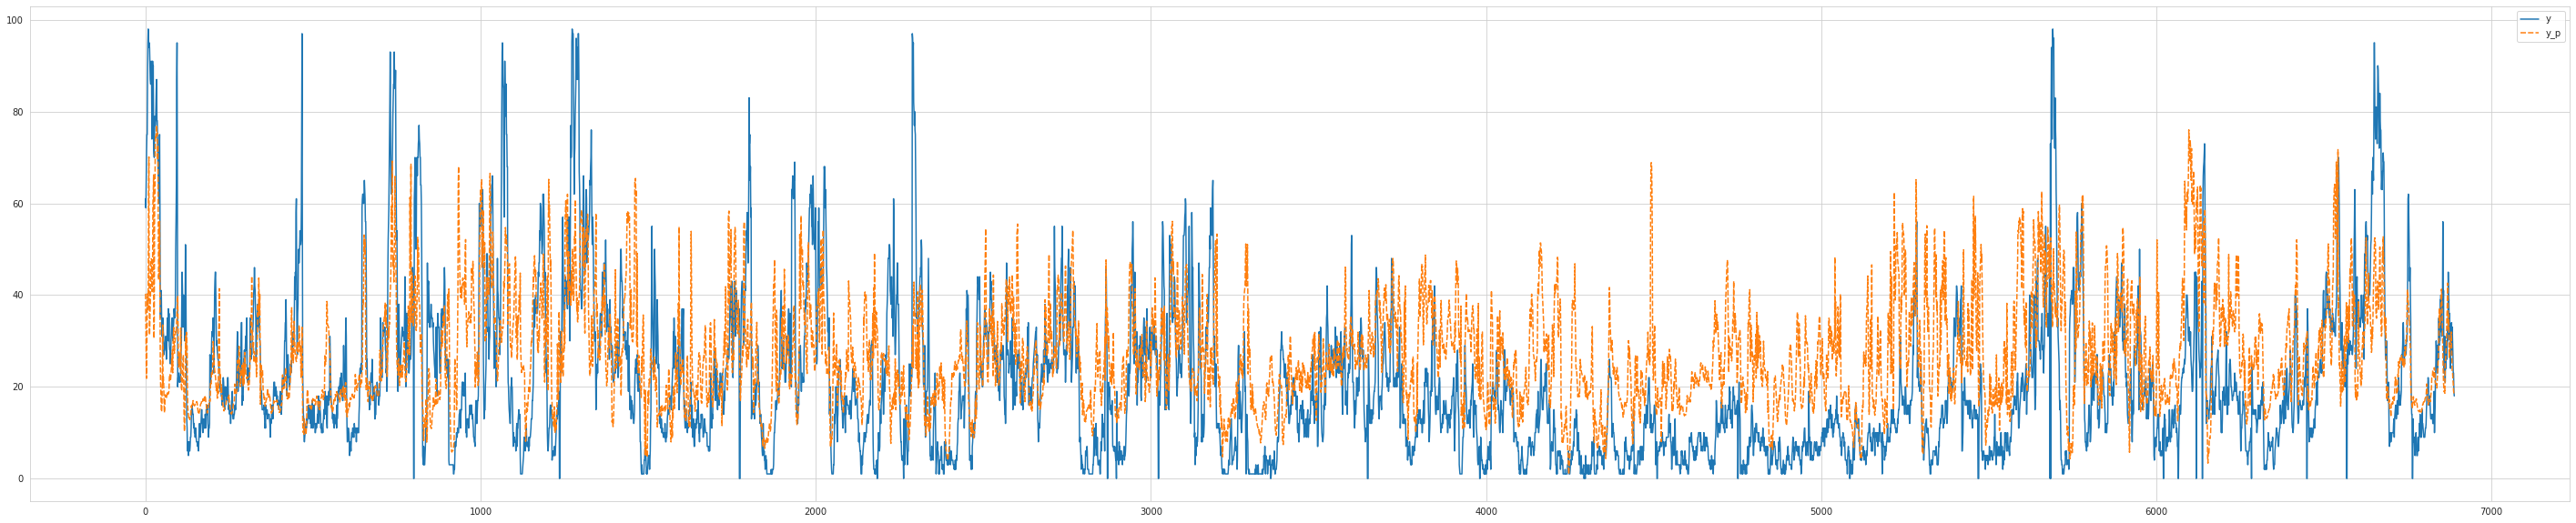

In [ ]:
# model.load_state_dict(torch.load('./snapshot/best_model.pt'))
model.eval()
prediction = model(x_test.to(DEVICE)) 
print(prediction.view(-1).cpu().detach().numpy().shape)
a = pd.DataFrame(y_test.view(-1), columns=["y"])
a["y_p"] = pd.Series(prediction.view(-1).cpu().detach().numpy())

loss = sum((a[["y_p"]].values - a[["y"]].values)**2) / a.shape[0]
print(loss)
plt.figure(figsize=(50,10))
sns.lineplot(data=a)

https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f


In [ ]:
## ÏßÄÎèÑÎ•º Ï∂îÏ∂ú
!pip install pyshp
!pip install geopandas

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 225kB 22.0MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=592365938bc1d4d3488ad990ca3318eb30b49ef8050b00208de2ccbb434762a1
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.0MB 18.7MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.5MB 52.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.8MB 214kB/s 


In [ ]:
!ls -la /dataset/MyDrive/dust/

total 1622893
-rw------- 1 root root    2439292 Jan  5 22:44 'best_model (1).pt'
-rw------- 1 root root    2439291 Jan  5 03:42  best_model.pt
-rw------- 1 root root 1655826560 Jul  8  2019  data.hdf
-rw------- 1 root root      20499 Mar  3 16:00  LARD_ADM_SECT_SGG_11.dbf
-rw------- 1 root root        761 Mar  3 16:00  LARD_ADM_SECT_SGG_11.prj
-rw------- 1 root root     494976 Mar  3 16:00  LARD_ADM_SECT_SGG_11.shp
-rw------- 1 root root        308 Mar  3 16:00  LARD_ADM_SECT_SGG_11.shx
-rw------- 1 root root     618368 Mar  4 10:43  seoul_municipalities.shp


In [ ]:
import geopandas as geopd
shp_path = "/dataset/MyDrive/dust/LARD_ADM_SECT_SGG_11.shp"
sf = geopd.read_file(shp_path,encoding='MS949')
sf["SGG_NM"] = sf["SGG_NM"].str.replace("ÏÑúÏö∏Ïãú", "")

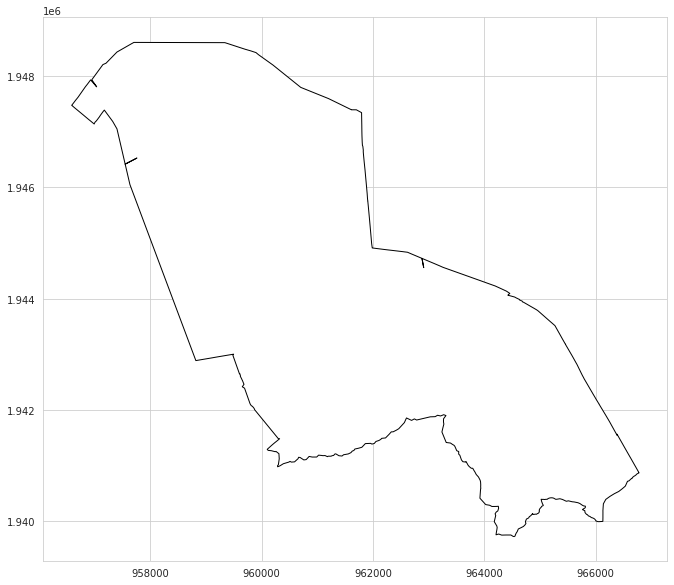

In [ ]:
import imageio
from IPython.display import Image

fig, ax = plt.subplots(figsize=(16,10))
gangnam = sf[sf["SGG_NM"] == "Í∞ïÎÇ®Íµ¨"]
gangnam.plot(ax=ax, color='w', edgecolor='black') 

In [ ]:
a = gangnam.merge(master[["MSRSTE_NM", "PM25"]], left_on=["SGG_NM"], right_on=["MSRSTE_NM"])
a

ADM_SECT_C SGG_NM  ...  MSRSTE_NM  PM25
0          11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  14.0
1          11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  17.0
2          11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  13.0
3          11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  14.0
4          11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  17.0
...          ...    ...  ...        ...   ...
69275      11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  27.0
69276      11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  23.0
69277      11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  23.0
69278      11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  19.0
69279      11680    Í∞ïÎÇ®Íµ¨  ...        Í∞ïÎÇ®Íµ¨  18.0

[69280 rows x 8 columns]

In [ ]:
## SAVE MODEL / LEARNING RATE INFORMATION
from google.colab import files
files.download('./curve_2_model_3_batch.gif') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>